In [14]:
%matplotlib inline


===================================================
Lasso model selection: Cross-Validation / AIC / BIC
===================================================

Use the Akaike information criterion (AIC), the Bayes Information
criterion (BIC) and cross-validation to select an optimal value
of the regularization parameter alpha of the `lasso` estimator.

Results obtained with LassoLarsIC are based on AIC/BIC criteria.

Information-criterion based model selection is very fast, but it
relies on a proper estimation of degrees of freedom, are
derived for large samples (asymptotic results) and assume the model
is correct, i.e. that the data are actually generated by this model.
They also tend to break when the problem is badly conditioned
(more features than samples).

For cross-validation, we use 20-fold with 2 algorithms to compute the
Lasso path: coordinate descent, as implemented by the LassoCV class, and
Lars (least angle regression) as implemented by the LassoLarsCV class.
Both algorithms give roughly the same results. They differ with regards
to their execution speed and sources of numerical errors.

Lars computes a path solution only for each kink in the path. As a
result, it is very efficient when there are only of few kinks, which is
the case if there are few features or samples. Also, it is able to
compute the full path without setting any meta parameter. On the
opposite, coordinate descent compute the path points on a pre-specified
grid (here we use the default). Thus it is more efficient if the number
of grid points is smaller than the number of kinks in the path. Such a
strategy can be interesting if the number of features is really large
and there are enough samples to select a large amount. In terms of
numerical errors, for heavily correlated variables, Lars will accumulate
more errors, while the coordinate descent algorithm will only sample the
path on a grid.

Note how the optimal value of alpha varies for each fold. This
illustrates why nested-cross validation is necessary when trying to
evaluate the performance of a method for which a parameter is chosen by
cross-validation: this choice of parameter may not be optimal for unseen
data.


In [24]:
import chaospy as cp
import chaospy 
# dist = cp.Normal()
dist = chaospy.Iid(chaospy.Gamma(1), 2)
orths = chaospy.orth_ttr(11, dist)

# p = 10
# cp.orth_ttr(p, dist)

ValueError: ':' is not an allowed character in buffer field names

Automatically created module for IPython interactive environment
Computing regularization path using the Lars lasso...
(531,)
Computing regularization path using the Lars lasso...
(442, 24)
(1052,)


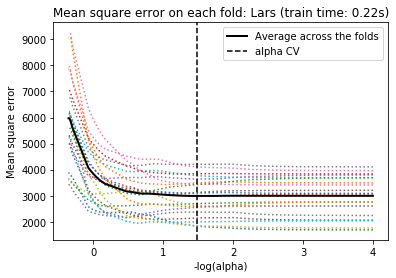

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


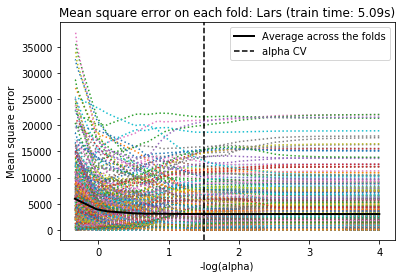

In [15]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, LassoLars
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

X, y = datasets.load_diabetes(return_X_y=True)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

# model_bic = LassoLarsIC(criterion='bic')
# t1 = time.time()
# model_bic.fit(X, y)
# t_bic = time.time() - t1
# alpha_bic_ = model_bic.alpha_

# model_aic = LassoLarsIC(criterion='aic')
# model_aic.fit(X, y)
# alpha_aic_ = model_aic.alpha_


# def plot_ic_criterion(model, name, color):
#     alpha_ = model.alpha_ + EPSILON
#     alphas_ = model.alphas_ + EPSILON
#     criterion_ = model.criterion_
#     plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
#              linewidth=3, label='%s criterion' % name)
#     plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
#                 label='alpha: %s estimate' % name)
#     plt.xlabel('-log(alpha)')
#     plt.ylabel('criterion')


# plt.figure()
# plot_ic_criterion(model_aic, 'AIC', 'b')
# plot_ic_criterion(model_bic, 'BIC', 'r')
# plt.legend()
# plt.title('Information-criterion for model selection (training time %.3fs)'
#           % t_bic)

# # #############################################################################
# # LassoCV: coordinate descent

# # Compute paths
# print("Computing regularization path using the coordinate descent lasso...")
# t1 = time.time()
# model = LassoCV(cv=20).fit(X, y)
# t_lasso_cv = time.time() - t1

# # Display results
# m_log_alphas = -np.log10(model.alphas_ + EPSILON)

# plt.figure()
# ymin, ymax = 2300, 3800
# plt.plot(m_log_alphas, model.mse_path_, ':')
# plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
#          label='Average across the folds', linewidth=2)
# plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
#             label='alpha: CV estimate')

# plt.legend()

# plt.xlabel('-log(alpha)')
# plt.ylabel('Mean square error')
# plt.title('Mean square error on each fold: coordinate descent '
#           '(train time: %.2fs)' % t_lasso_cv)
# plt.axis('tight')
# plt.ylim(ymin, ymax)

# # #############################################################################
# # LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1
print(model.cv_alphas_.shape)
# Display results
m_log_alphas = -np.log10(model.cv_alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
# plt.ylim(ymin, ymax)


print("Computing regularization path using the Lars lasso...")
print(X.shape)
t1 = time.time()
model = LassoLarsCV(cv=X.shape[0]).fit(X, y)
t_lasso_lars_cv = time.time() - t1
print(model.cv_alphas_.shape)
# Display results
m_log_alphas = -np.log10(model.cv_alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')


plt.show()

In [22]:
EPSILON = 1e-4

X, y = datasets.load_diabetes(return_X_y=True)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))
# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
print(dir(LassoLars))
model = LassoLars(alpha=0.1).fit(X,y)
t_lasso_lars = time.time() - t1

# Display results
# m_log_alphas = -np.log10(model.cv_alphas_ + EPSILON)

# plt.figure()
# plt.plot(m_log_alphas, model.mse_path_, ':')
# plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
#          label='Average across the folds', linewidth=2)
# plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
#             label='alpha CV')
# plt.legend()

# plt.xlabel('-log(alpha)')
# plt.ylabel('Mean square error')
# plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
#           % t_lasso_lars_cv)
# plt.axis('tight')
# plt.ylim(ymin, ymax)

Computing regularization path using the Lars lasso...
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_decision_function', '_estimator_type', '_fit', '_get_gram', '_get_param_names', '_preprocess_data', '_set_intercept', 'fit', 'get_params', 'method', 'predict', 'score', 'set_params']


In [35]:
from sklearn import linear_model
for ialpha in [1e-3,1e-2,0.1,0.3,0.5,0.7,1]:
    reg = linear_model.LassoLars(alpha=ialpha)
    X = np.array([[-1, 1], [0, 0], [1, 1]])
    y = np.array([-1, 0, -1])

    X, y = datasets.load_diabetes(return_X_y=True)
    X /= np.sqrt(np.sum(X ** 2, axis=0))
    # print(X.shape)
    # print(y.shape)
    reg.fit(X,y)
    # print(reg.coef_path_)
    # print(reg.coef_)
    print(reg.active_)
    print(reg.n_iter_)
#     print(reg.get_params())



[2, 8, 3, 1, 9, 4, 7, 5, 0, 6]
12
{'alpha': 0.001, 'copy_X': True, 'eps': 2.220446049250313e-16, 'fit_intercept': True, 'fit_path': True, 'max_iter': 500, 'normalize': True, 'positive': False, 'precompute': 'auto', 'verbose': False}
[2, 8, 3, 1, 9, 4, 7, 5, 0]
10
{'alpha': 0.01, 'copy_X': True, 'eps': 2.220446049250313e-16, 'fit_intercept': True, 'fit_path': True, 'max_iter': 500, 'normalize': True, 'positive': False, 'precompute': 'auto', 'verbose': False}
[2, 8, 3, 6, 1, 9, 4]
7
{'alpha': 0.1, 'copy_X': True, 'eps': 2.220446049250313e-16, 'fit_intercept': True, 'fit_path': True, 'max_iter': 500, 'normalize': True, 'positive': False, 'precompute': 'auto', 'verbose': False}
[2, 8, 3, 6]
4
{'alpha': 0.3, 'copy_X': True, 'eps': 2.220446049250313e-16, 'fit_intercept': True, 'fit_path': True, 'max_iter': 500, 'normalize': True, 'positive': False, 'precompute': 'auto', 'verbose': False}
[2, 8, 3, 6]
4
{'alpha': 0.5, 'copy_X': True, 'eps': 2.220446049250313e-16, 'fit_intercept': True, 'fit_p